<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%EC%B2%AD%EC%99%80%EB%8C%80_%EB%8D%B0%EC%9D%B4%ED%84%B0/%EC%B2%AD%EC%99%80%EB%8C%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_LSTMipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
plt.style.use('ggplot')

In [3]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.5 MB/s 
     |████████████████████████████████| 448 kB 2.7 MB/s 


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
train=pd.read_csv('/content/drive/MyDrive/청와대/train.csv')
test=pd.read_csv('/content/drive/MyDrive/청와대/test.csv')
sample=pd.read_csv('/content/drive/MyDrive/청와대/sample_submission.csv')

In [7]:
train.head()

,index,category,data
0,0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,3,1,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


# 타겟값 확인

In [8]:
import seaborn as sns

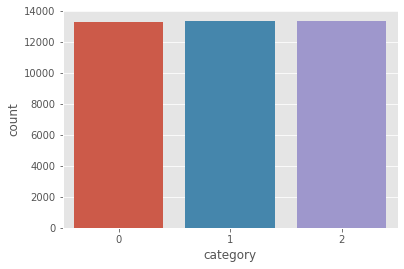

In [9]:
sns.countplot(data=train,x='category')

얼마 차이 안남요

# 문자 길이 분포

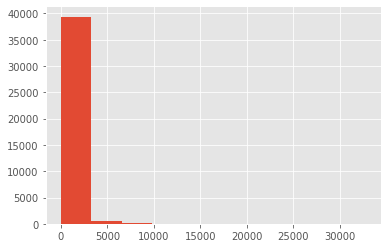

In [8]:
train['data'].str.len().hist()

# 평균단어길이

In [15]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 68.6 MB/s 
     |████████████████████████████████| 448 kB 40.8 MB/s 


In [10]:
from konlpy.tag import Okt

## 한글, 공백 제외 모두 제거

In [20]:
train=train.dropna(how='any')
train['data']=train['data'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test['data'] = test['data'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','을']

In [21]:
train.head()

,index,category,data
0,0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지 마...
1,1,0,학교이름에 남자도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등 글짓...
2,2,1,빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올림픽에...
3,3,1,티비 세세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴일이 생...
4,4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타이...


In [22]:
train['data']=train['data'].str.replace('^ +',"")
train['data'].replace('',np.nan,inplace=True)
print(train.isnull().sum())

index       0
category    0
data        0
dtype: int64


In [23]:
test['data']=test['data'].str.replace('^ +',"")#공백은 empty값으로 변경
test['data'].replace('',np.nan,inplace=True)

In [24]:
train.head()

,index,category,data
0,0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지 마...
1,1,0,학교이름에 남자도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등 글짓...
2,2,1,빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올림픽에...
3,3,1,티비 세세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴일이 생...
4,4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타이...


## 토큰화

불용어제거

In [26]:
okt=Okt()

In [27]:
X_train=[]
for sentence,i in zip(train['data'],tqdm(range(len(train['data'])))):
  temp_X=[]
  temp_X=okt.morphs(sentence,stem=True)
  temp_X=[word for word in temp_X if not word in stopwords]
  X_train.append(temp_X)

100%|█████████▉| 39981/39982 [40:01<00:00, 16.65it/s]


In [28]:
print(X_train[:3])

[['신혼부부', '위', '주택', '정책', '보다', '보육', '시설', '늘리다', '국민', '세금', '일부', '위', '정책', '펴다', '말다', '보편', '적', '모든', '국민', '수긍', '수', '있다', '복지', '정책', '펴다', '주다', '바라다', '저', '신혼부부', '이지만', '당첨', '되다', '사람', '로또', '되다', '이런', '주택', '정책', '반대', '국민', '세금', '을', '일부', '사람', '에게', '퍼', '주기', '식이', '되다', '안되다', '그', '세금', '우리', '아이', '안전하다', '맡기다', '수', '있다', '보육', '시설', '을', '전국', '설치', '줄다', '대기업', '솔선수범', '모든', '사업', '장', '의무', '설치', '수', '있다', '집', '보다', '애', '맡기다', '없다', '경력', '단절', '되다', '더', '괴롭다', '집다', '개인', '능력', '을', '키우다', '살다', '맞다', '그', '능력', '을', '키우다', '있다', '육아', '전담', '힘', '을', '기울이다', '맞다', '우리', '아이', '부모', '키우다', '맞다', '이제', '국가', '책임지다', '시대', '로', '가다', '맞다', '보다', '그렇다', '부동산', '가격', '자꾸', '올라가다', '정부', '정책', '잘못', '되어다', '보다', '부동산', '그냥', '내버리다', '두다', '건들', '수록', '역효과', '네', '요'], ['학교', '이름', '남자', '붙이다', '울산', '여자', '중학교', '재학', '중', '인', '학생', '이다', '최근', '양성평등', '글짓기', '생각', '우리', '울산', '엔', '울산', '중학교', '두', '개입', '니', '다', '하나', '남중', '하나', '여중', '인데', '어째서', '우

In [29]:
X_test = []
for sentence in tqdm(test['data']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████| 5000/5000 [10:35<00:00,  7.87it/s]


In [30]:
print(X_test[:3])

[['소년법', '폐지', '해주다', '법', '아래', '에서', '보호', '받다', '아이', '이법', '인하다', '보호', '받다', '못', '하고', '있다', '오히려', '법', '을', '악용', '사례', '만', '늘어나다', '그', '강도', '높아지다', '있다', '소년법', '폐지', '부탁드리다'], ['국', '공립', '유치원', '증설', '관', '국', '공립', '유치원', '부지', '학보', '건립', '및', '증설', '지역', '어린이', '놀이터', '부지', '지역', '방대하다', '주민', '센터', '휴', '계부', '지', '및', '구청', '시청', '군청', '청사', '공간', '부지', '활용', '청년실업', '퇴직', '희망', '재교육', '을', '통해', '유아', '유치', '업무', '종사', '방법', '불가능하다', '건가', '요'], ['나경원', '파면', '나경원', '의원', '동계올림픽', '위원', '을', '파면', '줄다']]


# 정수인코딩

In [31]:
#단어집합 만들기
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)

In [32]:
print(tokenizer.word_index)

{'을': 1, '있다': 2, '되다': 3, '이다': 4, '것': 5, '에서': 6, '로': 7, '적': 8, '않다': 9, '없다': 10, '수': 11, '하고': 12, '아니다': 13, '보다': 14, '그': 15, '인': 16, '생각': 17, '받다': 18, '아이': 19, '사람': 20, '저': 21, '해주다': 22, '고': 23, '에게': 24, '못': 25, '되어다': 26, '일': 27, '국민': 28, '만': 29, '학생': 30, '말': 31, '제': 32, '많다': 33, '년': 34, '같다': 35, '학교': 36, '다': 37, '등': 38, '교육': 39, '더': 40, '법': 41, '문제': 42, '청원': 43, '그렇다': 44, '까지': 45, '선수': 46, '대한': 47, '교사': 48, '때': 49, '대한민국': 50, '가다': 51, '하': 52, '좋다': 53, '여성': 54, '처벌': 55, '우리': 56, '안': 57, '시간': 58, '들다': 59, '위': 60, '시키다': 61, '사건': 62, '이렇다': 63, '폐지': 64, '만들다': 65, '위해': 66, '사회': 67, '요': 68, '중': 69, '나': 70, '님': 71, '서': 72, '그리고': 73, '때문': 74, '지금': 75, '국가': 76, '주다': 77, '대통령': 78, '전': 79, '청소년': 80, '나라': 81, '및': 82, '정부': 83, '성': 84, '왜': 85, '게': 86, '이나': 87, '이유': 88, '바라다': 89, '안되다': 90, '너무': 91, '나오다': 92, '부터': 93, '경우': 94, '피해자': 95, '한국': 96, '어떻다': 97, '알다': 98, '시': 99, '지': 100, '현재': 101, '에는': 102, '내'

In [33]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 55137
등장 빈도가 2번 이하인 희귀 단어의 수: 24769
단어 집합에서 희귀 단어의 비율: 44.922647224187024
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.5021474690784058


개많음

In [34]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 30369


In [35]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [36]:
print(X_train[:3])

[[6021, 60, 2537, 144, 14, 267, 550, 666, 28, 349, 402, 60, 144, 2475, 261, 3892, 8, 104, 28, 6479, 11, 2, 748, 144, 2475, 77, 89, 21, 6021, 773, 5278, 3, 20, 3614, 3, 345, 2537, 144, 172, 28, 349, 1, 402, 20, 24, 4376, 2017, 3093, 3, 90, 15, 349, 56, 19, 1153, 1302, 11, 2, 267, 550, 1, 602, 919, 156, 1858, 11696, 104, 679, 283, 194, 919, 11, 2, 260, 14, 357, 1302, 10, 1343, 2703, 3, 40, 3024, 2725, 196, 559, 1, 242, 205, 166, 15, 559, 1, 242, 2, 869, 2783, 419, 1, 2387, 166, 56, 19, 155, 242, 166, 211, 76, 1146, 562, 7, 51, 166, 14, 44, 2698, 1230, 2157, 1384, 83, 144, 439, 26, 14, 2698, 354, 4959, 273, 11904, 4514, 9675, 710, 68], [36, 575, 169, 2010, 2453, 154, 544, 1837, 69, 16, 30, 4, 465, 1872, 17915, 17, 56, 2453, 721, 2453, 544, 217, 2148, 210, 37, 174, 8940, 174, 6954, 187, 3993, 56, 36, 29, 154, 2010, 169, 8245, 4, 49, 232, 36, 200, 44, 116, 2453, 544, 8940, 129, 169, 2010, 1111, 544, 1903, 22, 2004, 36, 575, 1, 741, 928, 49, 129, 56, 36, 1111, 6954, 8940, 354, 1111, 69, 243,

In [37]:
y_train = np.array(train['category'])

# 빈샘플 제거

In [38]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [39]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

39981
39981


# 패딩

리뷰의 최대 길이 : 9712
리뷰의 평균 길이 : 154.8592331357395


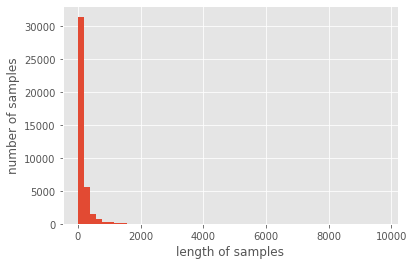

In [40]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

대체적으로 155내외의 길이. 모델이 처리할 수 ㅇㅆ도록 모든 샘플의 길이를 특정 길이로 동일하게 맞추기  

In [43]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [51]:
below_threshold_len(160, X_train)

전체 샘플 중 길이가 160 이하인 샘플의 비율: 72.20679822915885


In [52]:
max_len=160

In [53]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [54]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
500/500 [==============================] - ETA: 0s - loss: -4.0469 - acc: 0.4310
Epoch 1: val_acc improved from -inf to 0.50256, saving model to best_model.h5
500/500 [==============================] - 210s 413ms/step - loss: -4.0469 - acc: 0.4310 - val_loss: -11.6544 - val_acc: 0.5026
Epoch 2/15
500/500 [==============================] - ETA: 0s - loss: -17.1642 - acc: 0.5092
Epoch 2: val_acc did not improve from 0.50256
500/500 [==============================] - 204s 409ms/step - loss: -17.1642 - acc: 0.5092 - val_loss: -20.3547 - val_acc: 0.4353
Epoch 3/15
500/500 [==============================] - ETA: 0s - loss: -29.7441 - acc: 0.5068
Epoch 3: val_acc improved from 0.50256 to 0.52720, saving model to best_model.h5
500/500 [==============================] - 204s 409ms/step - loss: -29.7441 - acc: 0.5068 - val_loss: -39.1074 - val_acc: 0.5272
Epoch 4/15
500/500 [==============================] - ETA: 0s - loss: -40.9124 - acc: 0.4991
Epoch 4: val_acc did not improve from 

In [55]:
loaded_model = load_model('best_model.h5')